<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-12/Session-12%5CAssignment-12%5CAssignment-12-A%5CEVA_4_S12_A_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Load and Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test
# 13. Grad-CAM
# 14. Misclassified images

### 1. Mount google drive

In [0]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Set the directory path of google drive

In [0]:
import sys

sys.path.append('/content/drive/My Drive/eva-4/assignment-12')
sys.path.append('/content/drive/My Drive/eva-4/assignment-12/models')
sys.path.append('/content/drive/My Drive/eva-4/assignment-12/gradcam')
sys.path.append('/content/drive/My Drive/eva-4/assignment-12/sampleimages')
sys.path.append('/content/drive/My Drive/eva-4/assignment-12/misclassified')

In [0]:
cd '/content/drive/My Drive/eva-4/assignment-12'

/content/drive/My Drive/eva-4/assignment-11


In [0]:
ls

accuracy-loss-curves.png                  models/
augmentation.py                           outputs/
data/                                     plotutils.py
EVA_4_S11_Praveen_Raghuvanshi_Main.ipynb  __pycache__/
gradcam/                                  Readme.md
learningrate.py                           S11_functions.py
metrics.png                               sampleimages/
misclassifiedgradcamimages.png            utils.py
misclassified.png


### 3. Load and Import all modules and libraries

In [0]:
!pip install torchsummary

In [0]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-x_p09ry6
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-x_p09ry6
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=6d5f6012ab9e4f069671167bebe59031e2c9b2f306eec8c9ea7771d470c3af4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3b28lke/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [0]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-_eba4bwy
Created temporary directory: /tmp/pip-req-tracker-dx5157j9
Created requirements tracker '/tmp/pip-req-tracker-dx5157j9'
Created temporary directory: /tmp/pip-install-kwgek0y4
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-dx5157j9'


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torchvision.utils import make_grid
from torchsummary import summary

In [0]:
# Define hyper paramteres and constants
EPOCHS=24
trainaccuracies = []
trainlosses = []
testlosses = []
testaccuracies = []
lr_values = []

### 4. Set Device

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from s11model import S11Model
from S12_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, loadimage, saveimage
from S12_functions import getloss, getoptimizer, getscheduler
from gradcam import GradCAM, GradCAMpp, applygradcam
from gradcam_utils import Normalize, visualize_cam
from learningrate import findandplotlearningrate, plotCyclicLR, performLRRangeTest, getSchdeduler, getlr
from plotutils import plotimages, plotmisclassifiedimages, savemisclassifiedimages, plotmisclassifiedgradcamimages, plotmetrics 

###  6. Load Transformations

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [0]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [0]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

###### Sample Training Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

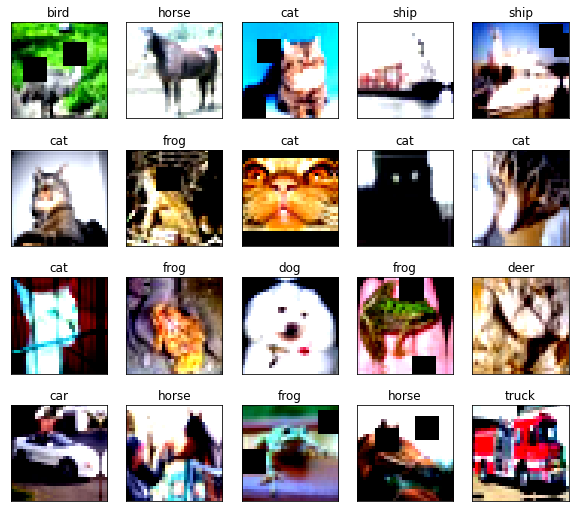

In [0]:
plotimages(device, classes, trainloader, 20)

###### Sample Test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

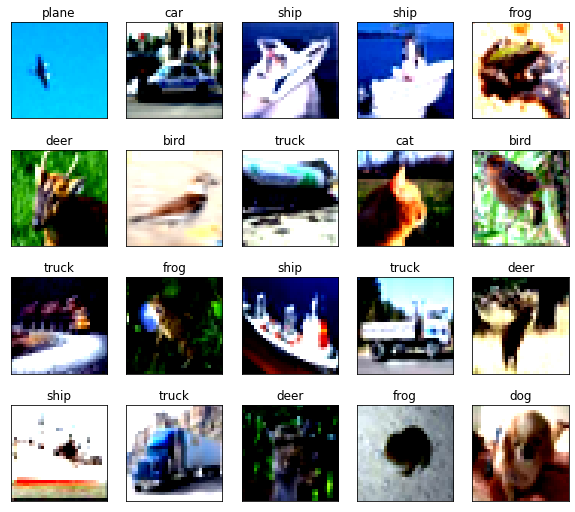

In [0]:
plotimages(device, classes, testloader, 20)

### 10. Load Custom Resnet Model


In [0]:
print("Building Model")
net = resnet18()

Building Model


In [0]:
# Display Model Summary
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/content/drive/My Drive/eva-4/assignment-11/models/s11model.py:73: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


### 11. Define loss function and optimizer


In [0]:
criterion = getloss()

#### Find Learning Rate

##### Plot CyclicLR 

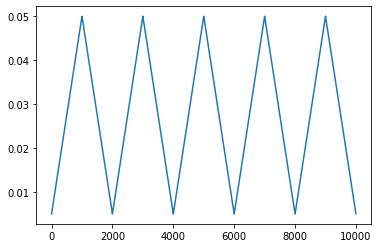

In [0]:
plotCyclicLR(total_iterations=10000, min_lr=0.005, max_lr=0.05, step_size=1000)

In [0]:
optimizer = getoptimizer(net, lr=1e-7, momentum=0.9, nesterov=True, weight_decay=0.05)

/content/drive/My Drive/eva-4/assignment-11/models/s11model.py:73: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


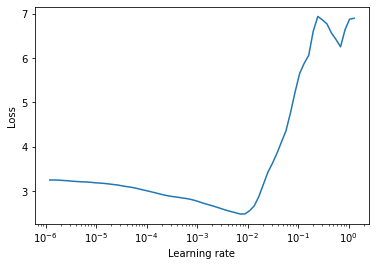

0.007244


In [0]:
max_lr = performLRRangeTest(model, optimizer, criterion, device, trainloader, end_lr=100, num_iter=100)

In [0]:
scheduler = getSchdeduler(optimizer, max_lr = 0.0125, epochs=EPOCHS, steps_per_epoch=1, pct_start=0.25)

### 12. Run Train and Test

In [0]:
for epoch in range(1, EPOCHS + 1):
    epochlr = getlr(optimizer)
    print("\nEPOCH:", epoch,'LR:',epochlr)
    lr_values.append(epochlr)
 
    train(net, trainloader, device, optimizer, criterion, trainaccuracies, trainlosses, epoch)
    scheduler.step()
    testloss = test(net, testloader, device, criterion, testaccuracies, testlosses, epoch)


EPOCH: 1 LR: 0.00125

Epoch: 1


/content/drive/My Drive/eva-4/assignment-11/models/s11model.py:73: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


 [================================================================>]  Step: 154ms | Tot: 22s380ms | Train >> Loss: 1.673 | Acc: 39.958% (19979/50000) 98/98 
 [=============================================================>...]  Step: 42ms | Tot: 1s728ms | Test >> Loss: 1.316 | Acc: 53.360% (5336/10000) 20/20 

EPOCH: 2 LR: 0.0035000000000000005

Epoch: 2
 [================================================================>]  Step: 153ms | Tot: 22s426ms | Train >> Loss: 1.169 | Acc: 58.118% (29059/50000) 98/98 
 [=============================================================>...]  Step: 45ms | Tot: 1s816ms | Test >> Loss: 1.234 | Acc: 57.530% (5753/10000) 20/20 

EPOCH: 3 LR: 0.005750000000000001

Epoch: 3
 [================================================================>]  Step: 151ms | Tot: 22s458ms | Train >> Loss: 0.879 | Acc: 69.098% (34549/50000) 98/98 
 [=============================================================>...]  Step: 44ms | Tot: 1s735ms | Test >> Loss: 0.826 | Acc: 71.600%

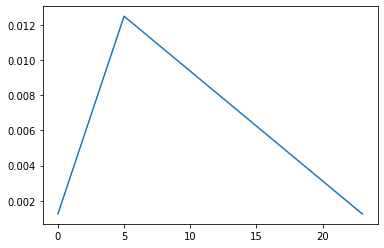

In [0]:
plt.plot(lr_values)

#### Plot Metrics - Accuracy and Loss

24
24


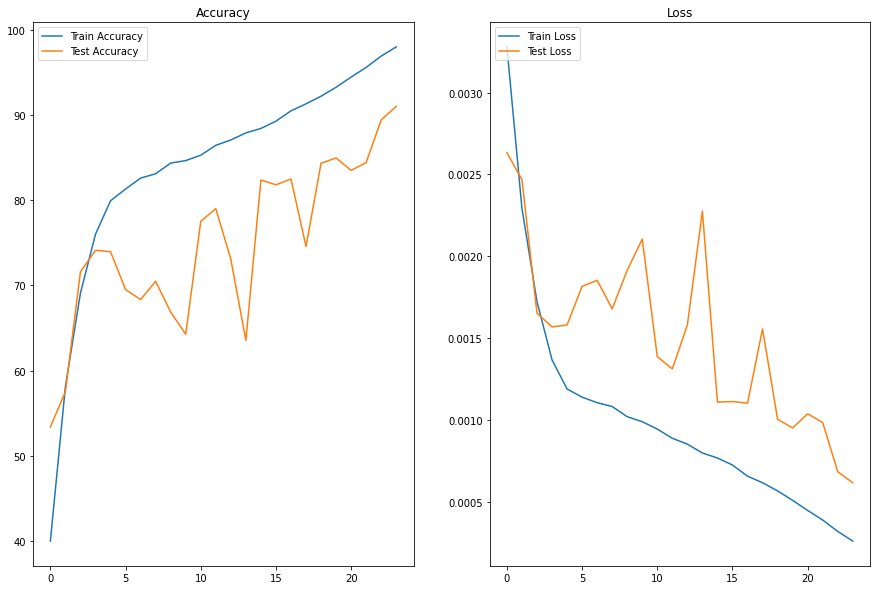

In [0]:
plotmetrics(trainaccuracies, testaccuracies, trainlosses, testlosses, savefilename="metrics")

### 14. Misclassified images

#### Get Misclassified Images

/content/drive/My Drive/eva-4/assignment-11/models/s11model.py:73: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input da

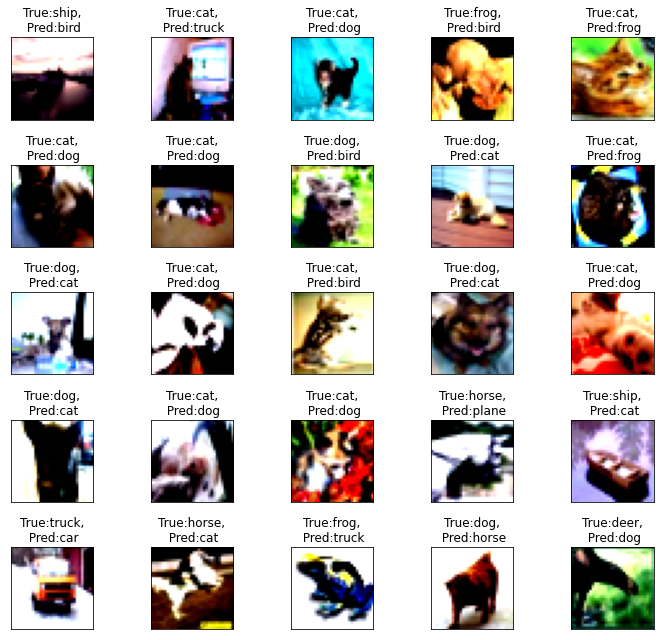

In [0]:
misclassifieddirectory = '/content/drive/My Drive/eva-4/assignment-11/misclassified'
names, titles = savemisclassifiedimages(model, device, classes, testloader, misclassifieddirectory, 25)

### 15. Analysis
- No of Epochs : 24
- Batch size : 512
- Best Test  Acc: 91.04%
- Best Train Acc: 98.03%
- Custom Model - S11Model
- Cutout : Yes
- Albumentations: Yes
- Hyperparameters
  - Optimizer: SGD
  - Learning rate: 0.0125
  - Momentum: 0.9